<a href="https://colab.research.google.com/github/IvanKatorgin/Satistics-in-Python/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%B2_Python_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Статистика в Python". Домашнее задание 2. Визуализация данных и описательная статистика. Каторгин И.П.

Вам предложено два датасета на выбор: “german_used_cars.csv” и “salary_dataset.csv”, которые вы сможете найти в материалах к занятию.

Задание:

- Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.

- Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.

- Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).

Желательно, но не обязательно:*

- Если данные содержат пропуски, заполните их и обоснуйте своё решение. Проверьте, как изменились базовые статистики до и после замены.

Требования по оформлению графиков:

У графиков должен быть заголовок, подписи осей, легенда (опционально). Каждая визуализация должным образом оформлена и может быть интерпретирована даже в отрыве от контекста.

Важно!

Оставляйте свои комментарии к графикам: отвечает ли визуализация на поставленный вопрос, что вы наблюдаете в данных, какие выводы можно сделать и т.д. Ход ваших мыслей так же важен, как и написанный вами код.

In [ ]:
import numpy as np, statistics as st, pandas as pd, math, matplotlib.pyplot as plt

In [ ]:
salary_dataset = pd.read_csv('salary_dataset.csv', encoding = "utf-8", sep = ',')
salary_dataset.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


Посмотрим визуально на распределение данных

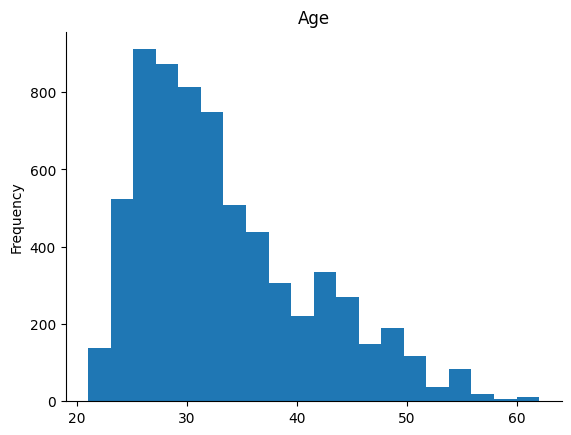

In [ ]:
# @title Age

from matplotlib import pyplot as plt
salary_dataset['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

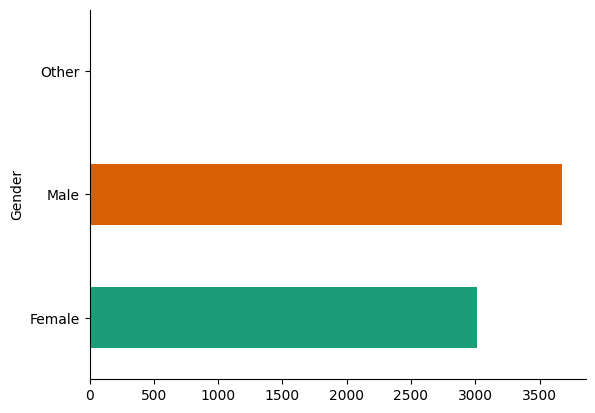

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
salary_dataset.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

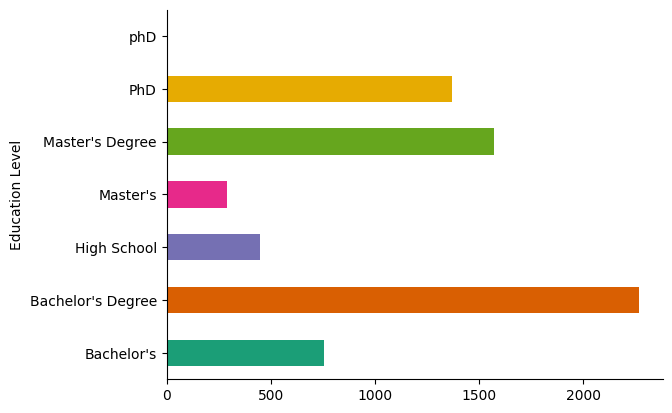

In [ ]:
# @title Education Level

from matplotlib import pyplot as plt
import seaborn as sns
salary_dataset.groupby('Education Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Job Title не строим, т.к. слишком много названий должностей, график получится нечитаемый

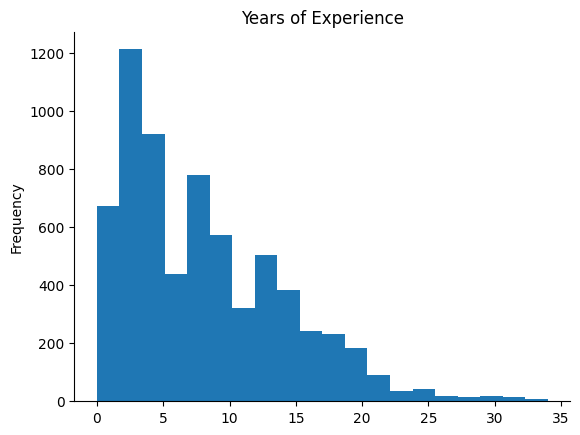

In [ ]:
# @title Years of Experience

from matplotlib import pyplot as plt
salary_dataset['Years of Experience'].plot(kind='hist', bins=20, title='Years of Experience')
plt.gca().spines[['top', 'right',]].set_visible(False)

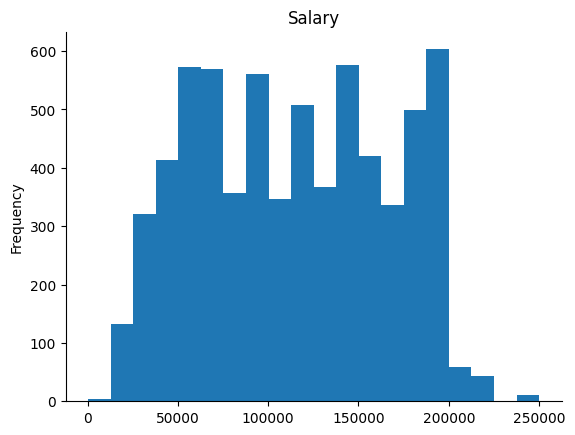

In [ ]:
# @title Salary

from matplotlib import pyplot as plt
salary_dataset['Salary'].plot(kind='hist', bins=20, title='Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

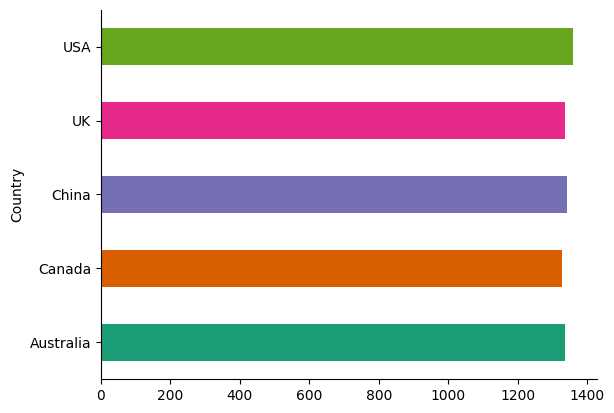

In [ ]:
# @title Country

from matplotlib import pyplot as plt
import seaborn as sns
salary_dataset.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

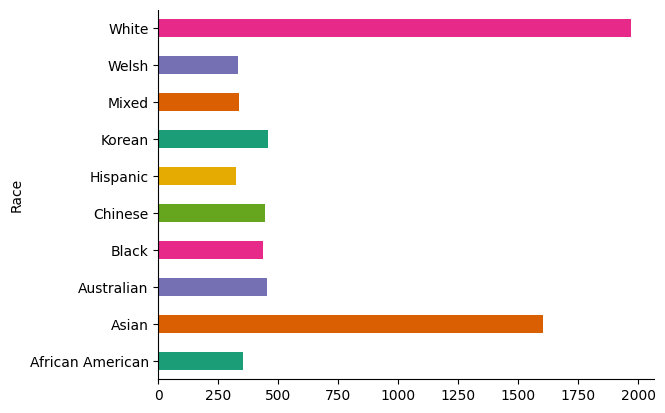

In [ ]:
# @title Race

from matplotlib import pyplot as plt
import seaborn as sns
salary_dataset.groupby('Race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Проведем оценку данных по столбцам, определим базовые и описательные статистики, где это возможно

In [ ]:
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [ ]:
(salary_dataset.isna().mean() * 100).round(2)

Unnamed: 0             0.00
Age                    0.03
Gender                 0.03
Education Level        0.04
Job Title              0.03
Years of Experience    0.04
Salary                 0.07
Country                0.00
Race                   0.00
dtype: float64

In [ ]:
salary_dataset['Age'].value_counts()

Age
27.0    517
30.0    449
29.0    444
28.0    429
33.0    398
26.0    394
31.0    365
32.0    351
34.0    309
25.0    284
36.0    282
24.0    240
35.0    200
42.0    176
43.0    158
39.0    158
37.0    156
38.0    149
45.0    144
41.0    129
44.0    126
23.0    104
46.0    102
48.0     98
40.0     92
49.0     91
50.0     88
54.0     68
47.0     47
51.0     30
52.0     29
21.0     18
55.0     16
22.0     15
56.0     11
57.0      9
53.0      7
58.0      7
62.0      5
60.0      5
61.0      2
Name: count, dtype: int64

In [ ]:
salary_dataset['Gender'].value_counts()

Gender
Male      3674
Female    3014
Other       14
Name: count, dtype: int64

In [ ]:
salary_dataset['Education Level'].value_counts()

Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [ ]:
salary_dataset['Job Title'].value_counts()

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Supply Chain Analyst            1
Name: count, Length: 193, dtype: int64

In [ ]:
salary_dataset['Years of Experience'].value_counts()

Years of Experience
2.0     610
3.0     602
1.0     540
4.0     522
6.0     439
8.0     426
5.0     399
9.0     380
7.0     353
11.0    320
12.0    294
14.0    253
16.0    242
13.0    209
10.0    192
15.0    129
18.0    126
19.0    121
0.0     120
17.0    106
20.0     61
22.0     47
21.0     42
23.0     37
25.0     24
24.0     19
28.0     16
1.5      12
29.0     12
27.0     11
32.0     10
26.0      7
30.0      6
33.0      6
31.0      5
34.0      2
0.5       1
Name: count, dtype: int64

In [ ]:
salary_dataset['Salary'].value_counts()

Salary
140000.0    287
120000.0    282
160000.0    276
55000.0     251
60000.0     231
           ... 
150534.0      1
68732.0       1
187951.0      1
137336.0      1
178284.0      1
Name: count, Length: 444, dtype: int64

In [ ]:
salary_dataset['Country'].value_counts()

Country
USA          1360
China        1343
UK           1337
Australia    1336
Canada       1328
Name: count, dtype: int64

In [ ]:
salary_dataset['Race'].value_counts()

Race
White               1968
Asian               1603
Korean               457
Australian           452
Chinese              444
Black                437
African American     354
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64

In [ ]:
print(salary_dataset['Age'].unique())
print(salary_dataset['Gender'].unique())
print(salary_dataset['Education Level'].unique())
print(salary_dataset['Job Title'].unique())
print(salary_dataset['Years of Experience'].unique())
print(salary_dataset['Salary'].unique())
print(salary_dataset['Country'].unique())
print(salary_dataset['Race'].unique())

[32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. nan 61. 57. 62. 55.
 56. 54. 60. 58. 22. 21.]
['Male' 'Female' nan 'Other']
["Bachelor's" "Master's" 'PhD' nan "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'S

In [ ]:
print(salary_dataset['Age'].mean())
print(salary_dataset['Age'].median())
print(salary_dataset['Age'].mode()[0])
print(salary_dataset['Age'].std())
print(salary_dataset['Age'].var())

33.62085944494181
32.0
27.0
7.614632626251303
57.98263003277081


In [ ]:
print(salary_dataset['Years of Experience'].mean())
print(salary_dataset['Years of Experience'].median())
print(salary_dataset['Years of Experience'].mode()[0])
print(salary_dataset['Years of Experience'].std())
print(salary_dataset['Years of Experience'].var())

8.094687360095508
7.0
2.0
6.059003056634102
36.7115180403014


In [ ]:
print(salary_dataset['Salary'].mean())
print(salary_dataset['Salary'].median())
print(salary_dataset['Salary'].mode()[0])
print(salary_dataset['Salary'].std())
print(salary_dataset['Salary'].var())

115326.96477086132
115000.0
140000.0
52786.18391068297
2786381211.852446


In [ ]:
salary_dataset[['Gender', 'Education Level', 'Job Title', 'Country', 'Race']].mode()

,Gender,Education Level,Job Title,Country,Race
0,Male,Bachelor's Degree,Software Engineer,USA,White


In [ ]:
salary_dataset[['Age', 'Years of Experience', 'Salary']].describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Выводы:

1. Имеются незначительные пропуски в столбцах Age, Gender, Education Level, Job Title, Years of Experience, Salary

2. Явных выбросов не найдено

3. Пропуски в столбце Gender предлагается объединить с группой other. При этом может измениться мода

4. По всей видимости Bachelor's Degree и Bachelor's, Master's Degree и Master's, а так же PhD и phD дублируют друг друга. Предлагается удалить дубликаты названия уровней образования. При этом может измениться мода

5. Пропуски в столбце Education Level предлагается заполнить other для объединения в одну группу. При этом может измениться мода

6. Пропуски в столбце Job Title предлагается заполнить other для объединения в одну группу. При этом может измениться мода

7. Пропуски в столбцах Age, Years of Experience, Salary пока не заполняем, т.к. это может повлиять на статистики, на распределение данных, а также на зависимости одних данных от других

In [ ]:
salary_dataset['Gender'] = salary_dataset['Gender'].fillna('Other')

In [ ]:
salary_dataset['Gender'].value_counts()

Gender
Male      3674
Female    3014
Other       16
Name: count, dtype: int64

In [ ]:
salary_dataset['Gender'].mode()

0    Male
Name: Gender, dtype: object

Мода не изменилась

Удаляем дубликаты в названии образования, пропуски заменяем на other



In [ ]:
salary_dataset['Education Level'].replace("Bachelor's", "Bachelor's Degree", inplace=True)

In [ ]:
salary_dataset['Education Level'].replace("Master's", "Master's Degree", inplace=True)

In [ ]:
salary_dataset['Education Level'].replace('phD', 'PhD', inplace=True)

In [ ]:
salary_dataset['Education Level'] = salary_dataset['Education Level'].fillna('Other')

In [ ]:
salary_dataset['Education Level'].value_counts()

Education Level
Bachelor's Degree    3023
Master's Degree      1861
PhD                  1369
High School           448
Other                   3
Name: count, dtype: int64

In [ ]:
salary_dataset['Education Level'].mode()

0    Bachelor's Degree
Name: Education Level, dtype: object

Мода не изменилась

Пропуски в столбце Job Title заменяем на other

In [ ]:
salary_dataset['Job Title'] = salary_dataset['Job Title'].fillna('Other')

In [ ]:
salary_dataset['Job Title'].value_counts()

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Customer Success Rep            1
Senior Training Specialist      1
Junior Web Designer             1
Sales Operations Manager        1
UX Researcher                   1
Name: count, Length: 194, dtype: int64

In [ ]:
salary_dataset['Job Title'].mode()

0    Software Engineer
Name: Job Title, dtype: object

Мода не изменилась

In [ ]:
(salary_dataset.isna().mean() * 100).round(2)

Unnamed: 0             0.00
Age                    0.03
Gender                 0.00
Education Level        0.00
Job Title              0.00
Years of Experience    0.04
Salary                 0.07
Country                0.00
Race                   0.00
dtype: float64

Проверим несколько гипотез

In [ ]:
salary_dataset

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's Degree,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


Гипотеза 1. С увеличением опыта работы растет зарплата

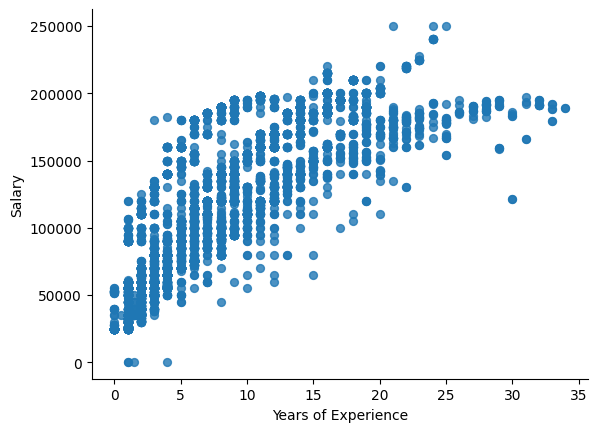

In [ ]:
# @title Years of Experience vs Salary

from matplotlib import pyplot as plt
salary_dataset.plot(kind='scatter', x='Years of Experience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

В целом гипотеза подтвердилась - с увеличением опыта зарплата действительно возрастает

Гипотеза 2. Уровень образования мужчин выше, чем у женщин

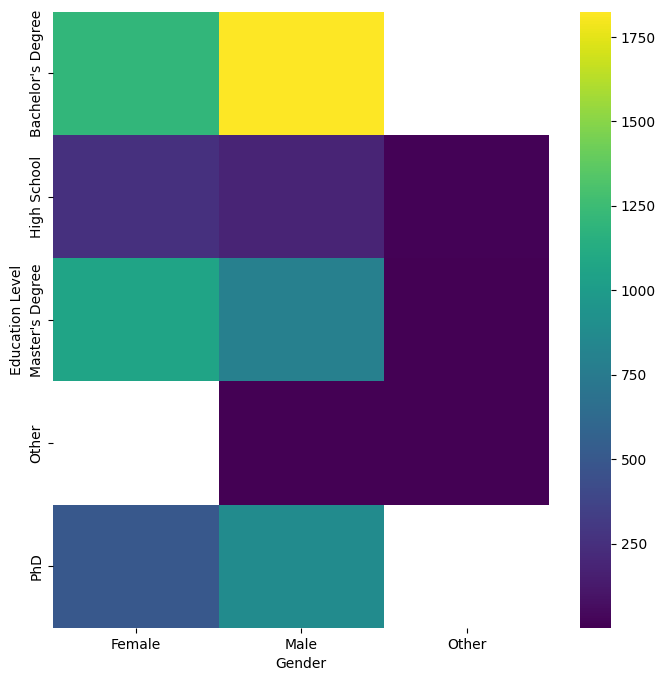

In [ ]:
# @title Gender vs Education Level

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Education Level'].value_counts()
    for x_label, grp in salary_dataset.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Education Level')

Однозначно неьзя подтвердить гипотезу, т.к. мужчин бакалавров, а также мужчин, у кого есть степень PhD больше, но при этом Master's Degree больше у женщин

Гипотеза 3. Зарплата зависит от уровня образования

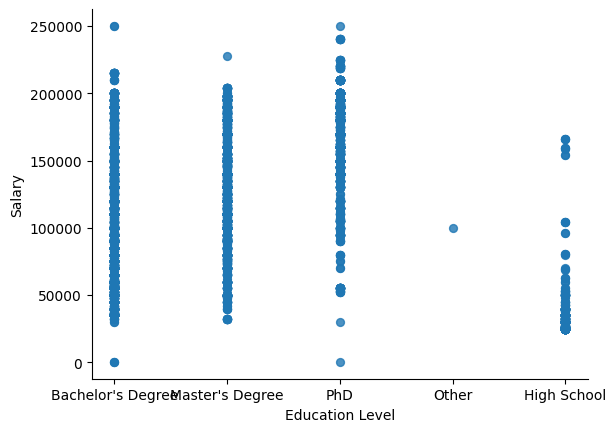

In [ ]:
# @title Education Level vs Salary

from matplotlib import pyplot as plt
salary_dataset.plot(kind='scatter', x='Education Level', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Гипотеза не подтверлилась. Нельзя сказать, что уровень образования сильно влияет на уровень зарплаты (за исключением отсутствия оразования)

Гипотеза 4. Мужчины зарабатывают больше

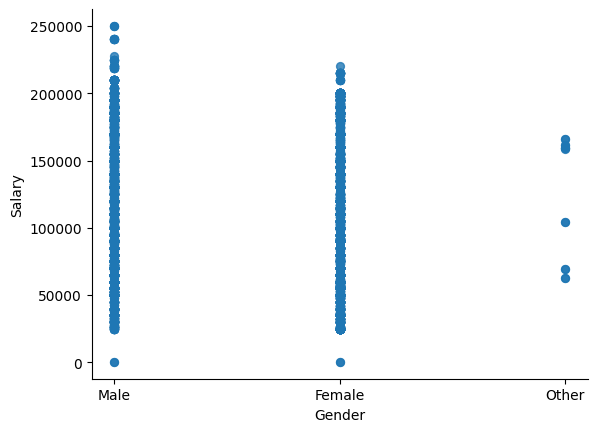

In [ ]:
# @title Gender vs Salary

from matplotlib import pyplot as plt
salary_dataset.plot(kind='scatter', x='Gender', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Максимальная зарплата выше у мужчин

Гипотеза 5. Уровень зарплаты зависит от национальности

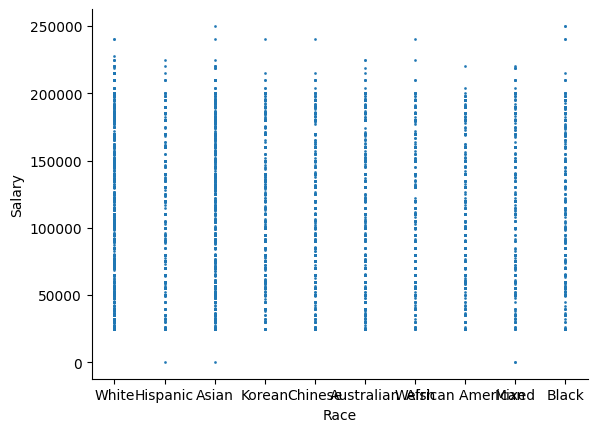

In [ ]:
# @title Race vs Salary

from matplotlib import pyplot as plt
salary_dataset.plot(kind='scatter', x='Race', y='Salary', s=1, alpha=.9)
plt.gca().spines[['top', 'right',]].set_visible(False)

Уровень зарплаты не зависит от национальности

Гипотеза 6. Уровень зарплаты зависит от страны

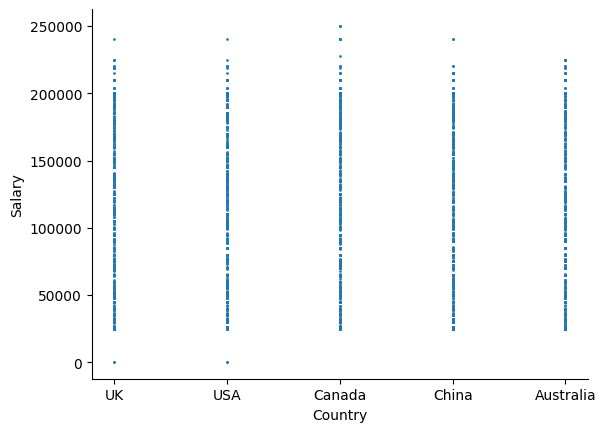

In [ ]:
# @title Country vs Salary

from matplotlib import pyplot as plt
salary_dataset.plot(kind='scatter', x='Country', y='Salary', s=1, alpha=.9)
plt.gca().spines[['top', 'right',]].set_visible(False)

Гипотеза не подтверилась. Уровень зарплаты не зависит от страны

Посмотрим на структуру распределения образования в странах

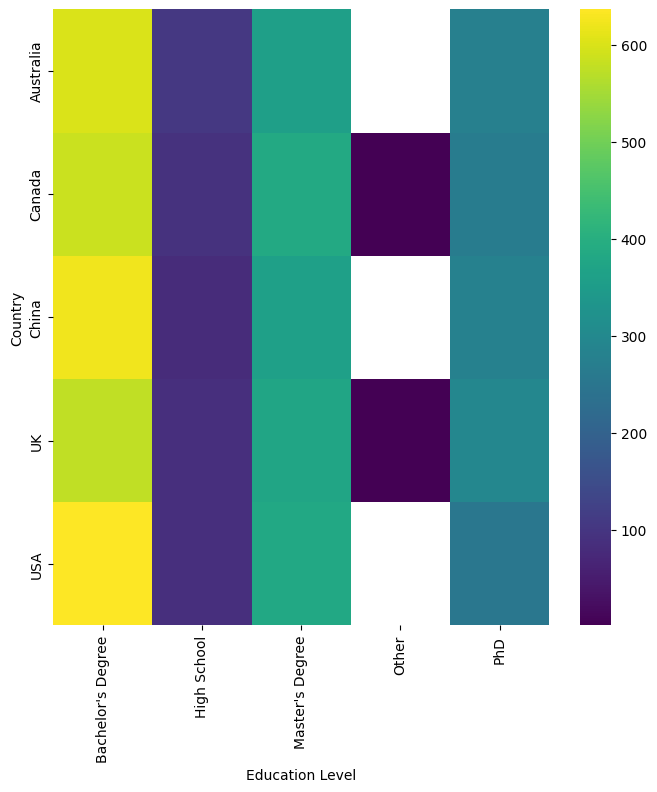

In [ ]:
# @title Education Level vs Country

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Country'].value_counts()
    for x_label, grp in salary_dataset.groupby('Education Level')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Education Level')
_ = plt.ylabel('Country')

Во всех странах распределение по образованию примерно одинаковое

Гипотеза 7. Структура образования зависит по национальности

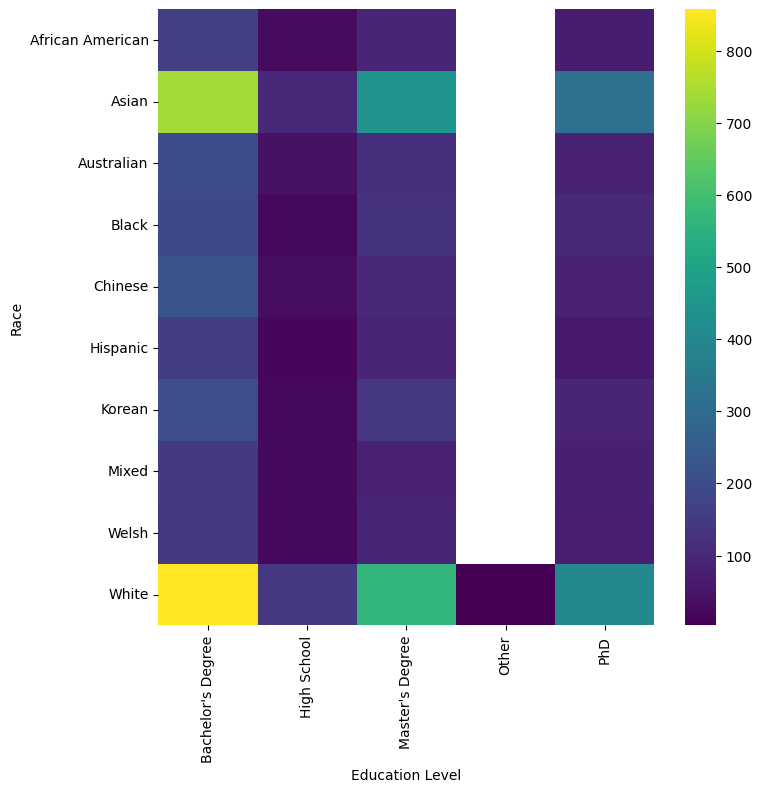

In [ ]:
# @title Education Level vs Country

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Race'].value_counts()
    for x_label, grp in salary_dataset.groupby('Education Level')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Education Level')
_ = plt.ylabel('Race')

В целом какого явного тренда не прослеживается. При этом стоит заметить, что наибольшее количество бакалавров, мастеров и phd среди white и asian. Но, поскольку их в целом больше в выборке, то говорить что они являются более образованными некорректно. Нужны дополнительные тесты для выявления закономерностей.

В работе был выполнен анализ данных, проведена оценка статитстических показателей, а также проверены несколько гипотез с помошью построения соответствующих визуализаций